Generating Content Interactions chart...


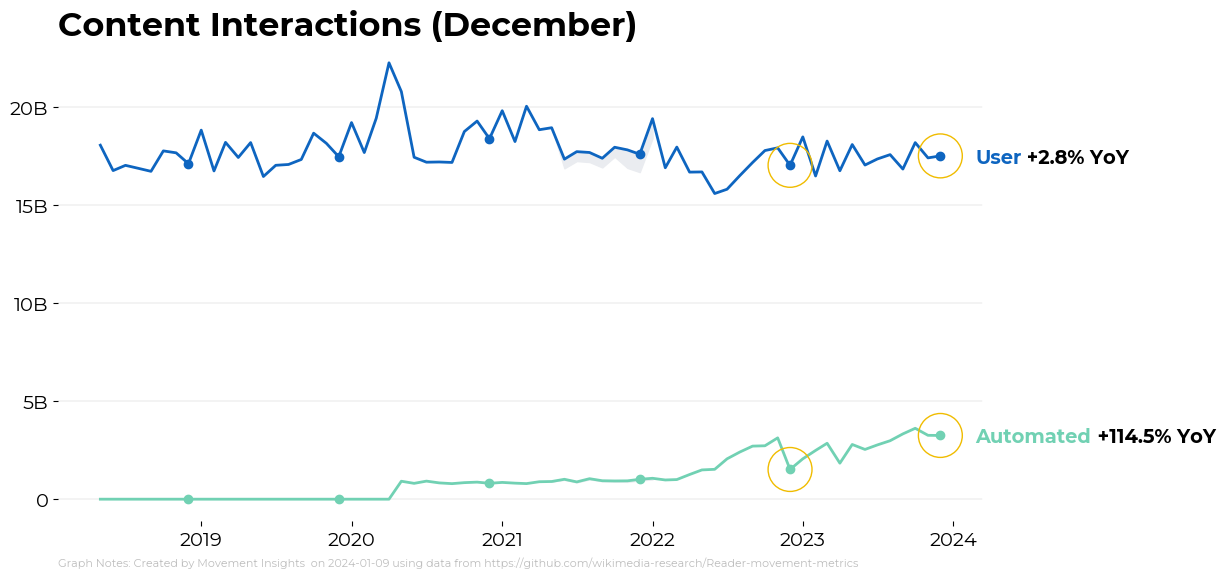

In [7]:
import pandas as pd
from datetime import date, datetime, timedelta
import os
from os.path import dirname
#local
#from wikicharts import Wikichart, wmf_colors
#jupyter notebook
%run wikicharts.ipynb

def main():
    print("Generating Content Interactions chart...")

    #---PARAMETERS---
    save_file_name = "Content_Interactions_User.png"
    #note for labeling the YoY highlight
    yoy_note = " "
    #display or note
    display_flag = True

    #---CLEAN DATA--
    df = pd.read_csv(readers_data_path, sep='\t')
 
    corrected_df = pd.read_csv(home_dir + '/resources/data/corrected_metrics_only.csv', sep=',')
    start_date = "2018-05-01"
    end_date = datetime.today()
    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])
    corrected_df['month'] = pd.to_datetime(corrected_df['month'])
    #set new index
    corrected_df.set_index('month')
    #truncate to preferred date range
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    #combine datasets — add corrected values to the reader metrics dataset
    df['interactions_corrected'] = df['interactions']
    df['automated_pageviews'] = df['automated_pageviews'].fillna(0)
    df['automated_pageviews_corrected'] = df['automated_pageviews']
    correction_range = pd.date_range(start='2021-05-01', end='2022-01-01', freq='MS')
    for m in correction_range:
        row_index = df[df['month'] == m].index 
        correct_row = corrected_df[corrected_df['month'] == m]

        # Update 'interactions_corrected' in df with values from corrected_df
        df.loc[row_index, 'interactions_corrected'] = correct_row['interactions_corrected'].values

        # Update 'automated_pageviews_corrected' in df
        df.loc[row_index, 'automated_pageviews_corrected'] = correct_row['automated_pageviews_corrected'].values

    # Separate automated and user traffic.  
    
    df['interactions_corrected'] = df['interactions_corrected'] - df['automated_pageviews_corrected']
    corrected_df['interactions_corrected'] = corrected_df['interactions_corrected'] - corrected_df['automated_pageviews_corrected']
    corrected_df['interactions'] = corrected_df['interactions'] - corrected_df['automated_pageviews']

    
    #---MAKE CHART---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot(width = 12)
    chart.plot_data_loss('month','interactions','interactions_corrected',corrected_df)
    chart.plot_data_loss('month','automated_pageviews','automated_pageviews_corrected',corrected_df)
    chart.plot_line('month','automated_pageviews_corrected',wmf_colors['brightgreen'])
    chart.plot_line('month','interactions_corrected',wmf_colors['blue'])
    chart.plot_monthlyscatter('month','interactions_corrected',wmf_colors['blue'])


    chart.plot_monthlyscatter('month','automated_pageviews_corrected',wmf_colors['brightgreen'])
    chart.plot_yoy_highlight('month','interactions_corrected')
    chart.plot_yoy_highlight('month','automated_pageviews_corrected')
    chart.format(title = f'Content Interactions',
        radjust=0.87,
        data_source="https://github.com/wikimedia-research/Reader-movement-metrics")
 
    
    # Annotating the lines with labels
    ys = ['automated_pageviews_corrected', 'interactions_corrected']
    
    # Creating a key DataFrame for label names and colors
    key = pd.DataFrame({
        'labelname': ['Automated', 'User'],
        'color': [wmf_colors['brightgreen'], wmf_colors['blue']]
    }, index=ys)

    # Call the multi_yoy_annotate function
    chart.multi_yoy_annotate(ys=ys, key=key, annotation_fxn=chart.calc_yoy, xpad = 5)
    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()

Generating Content Interactions chart...


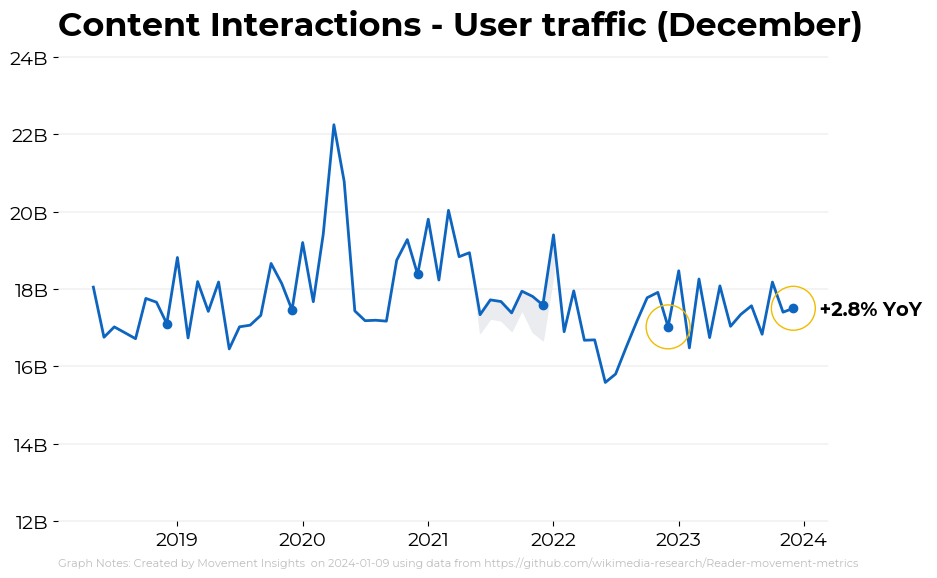

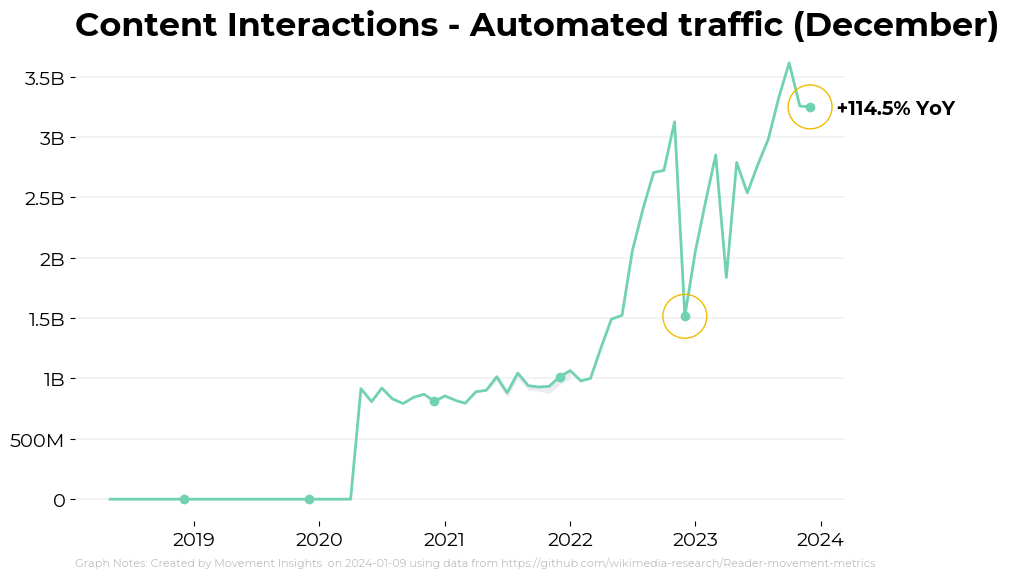

In [157]:
## Content interactions splint into 2 charts (auto and user)

def main():
    print("Generating Content Interactions chart...")

    #---PARAMETERS---
    save_file_name = "Content_Interactions_Automated.png"
    #note for labeling the YoY highlight
    yoy_note = " "
    #display or note
    display_flag = True

    #---CLEAN DATA--
    df = pd.read_csv(readers_data_path, sep='\t')
 
    corrected_df = pd.read_csv(home_dir + '/resources/data/corrected_metrics_only.csv', sep=',')
    start_date = "2018-05-01"
    end_date = datetime.today()
    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])
    corrected_df['month'] = pd.to_datetime(corrected_df['month'])
    #set new index
    corrected_df.set_index('month')
    #truncate to preferred date range
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    #combine datasets — add corrected values to the reader metrics dataset
    df['interactions_corrected'] = df['interactions']
    df['automated_pageviews_corrected'] = df['automated_pageviews']
    df['automated_pageviews_corrected'] = df['automated_pageviews_corrected'].fillna(0)

    correction_range = pd.date_range(start='2021-05-01', end='2022-01-01', freq='MS')
    for m in correction_range:
        row_index = df[df['month'] == m].index 
        correct_row = corrected_df[corrected_df['month'] == m]

        # Update 'interactions_corrected' in df with values from corrected_df
        df.loc[row_index, 'interactions_corrected'] = correct_row['interactions_corrected'].values

        # Additionally, update 'automated_pageviews_corrected' in df
        df.loc[row_index, 'automated_pageviews_corrected'] = correct_row['automated_pageviews_corrected'].values
    
    # Separate automated and user traffic.  
    df['interactions_corrected'] = df['interactions_corrected'] - df['automated_pageviews_corrected']
    corrected_df['interactions_corrected'] = corrected_df['interactions_corrected'] - corrected_df['automated_pageviews_corrected']
    corrected_df['interactions'] = corrected_df['interactions'] - corrected_df['automated_pageviews']
    

    
    #---MAKE CHART---
   # List of metrics to plot
    metrics = ['interactions_corrected', 'automated_pageviews_corrected']
    colors = {'interactions_corrected': wmf_colors['blue'], 'automated_pageviews_corrected': wmf_colors['brightgreen']}

    for metric in metrics:
        # Initialize chart for each metric
        chart = Wikichart(start_date, end_date, df)
        chart.init_plot()

        # Plot data loss and line for each metric
        chart.plot_data_loss('month', 'interactions' if metric == 'interactions_corrected' else 'automated_pageviews', metric, corrected_df)
        chart.plot_line('month', metric, colors[metric])
        chart.plot_monthlyscatter('month', metric, colors[metric])
        chart.plot_yoy_highlight('month', metric)

        # Formatting and annotations for each metric
        if metric == metrics[0]:
            chart.format(title=f'Content Interactions - User traffic',
                         radjust=0.87,
                         data_source="https://github.com/wikimedia-research/Reader-movement-metrics")
            chart.annotate(x='month',
                           y=metric,
                           num_annotation=chart.calc_yoy(y=metric))
        else:
            chart.format(title=f'Content Interactions - Automated traffic',
                     radjust=0.87,
                     data_source="https://github.com/wikimedia-research/Reader-movement-metrics")
            chart.annotate(x='month',
                       y=metric,
                       num_annotation=chart.calc_yoy(y=metric))

        # Save each plot separately
        chart.finalize_plot(f"{save_file_name}_{metric}.png", display=display_flag)

if __name__ == "__main__":
    main()

Generating Content Interactions chart...


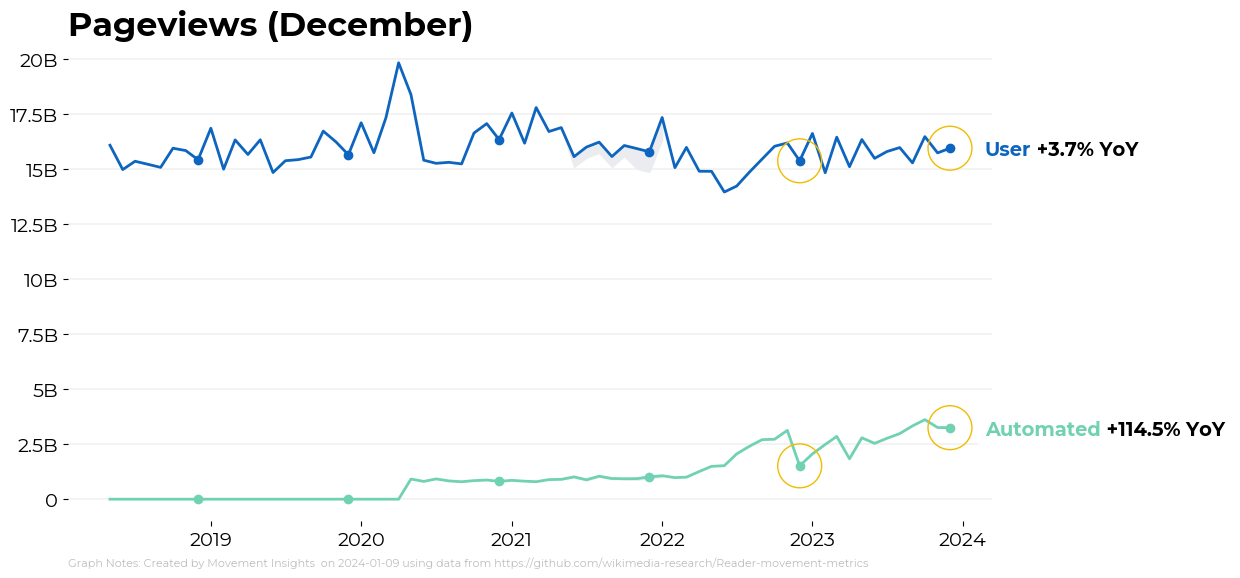

In [6]:
## Content interactions and Pageviews

def main():
    print("Generating Content Interactions chart...")

    #---PARAMETERS---
    save_file_name = "Content_Interactions_User.png"
    #note for labeling the YoY highlight
    yoy_note = " "
    #display or note
    display_flag = True

    #---CLEAN DATA--
    df = pd.read_csv(readers_data_path, sep='\t')
 
    corrected_df = pd.read_csv(home_dir + '/resources/data/corrected_metrics_only.csv', sep=',')
    start_date = "2018-05-01"
    end_date = datetime.today()
    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])
    corrected_df['month'] = pd.to_datetime(corrected_df['month'])
    #set new index
    corrected_df.set_index('month')
    #truncate to preferred date range
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    #combine datasets — add corrected values to the reader metrics dataset
    df['interactions_corrected'] = df['interactions']
    df['automated_pageviews'] = df['automated_pageviews'].fillna(0)
    df['automated_pageviews_corrected'] = df['automated_pageviews']
    df['total_pageview_corrected'] = df['total_pageview']
    correction_range = pd.date_range(start='2021-05-01', end='2022-01-01', freq='MS')
    for m in correction_range:
        row_index = df[df['month'] == m].index 
        correct_row = corrected_df[corrected_df['month'] == m]

        # Update 'interactions_corrected' in df with values from corrected_df
        df.loc[row_index, 'interactions_corrected'] = correct_row['interactions_corrected'].values

        # Update 'automated_pageviews_corrected' in df
        df.loc[row_index, 'automated_pageviews_corrected'] = correct_row['automated_pageviews_corrected'].values
        
        # Update 'total_pageviews_corrected' in df
        df.loc[row_index, 'total_pageview_corrected'] = correct_row['total_pageview_corrected'].values

    df['total_pageview_corrected'] = df['total_pageview_corrected'] - df['automated_pageviews_corrected']
    corrected_df['total_pageview_corrected'] = corrected_df['total_pageview_corrected'] - corrected_df['automated_pageviews_corrected']
    corrected_df['total_pageview'] = corrected_df['total_pageview'] - corrected_df['automated_pageviews']

    
    #---MAKE CHART---
    chart = Wikichart(start_date,end_date,df)
    chart.init_plot(width = 12)
    chart.plot_data_loss('month','automated_pageviews','automated_pageviews_corrected',corrected_df)
    chart.plot_data_loss('month','total_pageview','total_pageview_corrected',corrected_df)
    chart.plot_line('month','automated_pageviews_corrected',wmf_colors['brightgreen'])
    chart.plot_line('month','total_pageview_corrected',wmf_colors['blue'])
    chart.plot_monthlyscatter('month','total_pageview_corrected',wmf_colors['blue'])


    chart.plot_monthlyscatter('month','automated_pageviews_corrected',wmf_colors['brightgreen'])
    chart.plot_yoy_highlight('month','total_pageview_corrected')
    chart.plot_yoy_highlight('month','automated_pageviews_corrected')
    chart.format(title = f'Pageviews',
        radjust=0.87,
        data_source="https://github.com/wikimedia-research/Reader-movement-metrics")
 
    
    # Annotating the lines with labels
    ys = ['automated_pageviews_corrected', 'total_pageview_corrected']
    
    # Creating a key DataFrame for label names and colors
    key = pd.DataFrame({
        'labelname': ['Automated', 'User'],
        'color': [wmf_colors['brightgreen'], wmf_colors['blue']]
    }, index=ys)

    # Call the multi_yoy_annotate function
    chart.multi_yoy_annotate(ys=ys, key=key, annotation_fxn=chart.calc_yoy, xpad = 5)
    chart.finalize_plot(save_file_name,display=display_flag)

if __name__ == "__main__":
    main()